<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-and-Submitting-Data" data-toc-modified-id="Downloading-and-Submitting-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading and Submitting Data</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Understanding-the-data" data-toc-modified-id="Understanding-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding the data</a></span></li><li><span><a href="#Data-preparation-and-machine-learning" data-toc-modified-id="Data-preparation-and-machine-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation and machine learning</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

Here's a simple getting started notebook that shows you how to load the data, and how to create a Kaggle submission file. Remember that you should structure your notebook after the 8 step guide, as detailed in the [Assignment 1 instructions](https://hvl.instructure.com/courses/9086/assignments/17277). 

# Downloading and Submitting Data

## Setup

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data

Go to Kaggle competition website and download the data. Make a new folder in your DAT158ML repository called 'data'. Store the Kaggle competition data in this folder

Then you should uncomment the code and run the following two cells. **Warning:** This doesn't work in this Kaggle hosted notebook! See below

In [22]:
# Lists the files in the folder

import os

print(os.listdir("data"))

['.DS_Store', 'sample_submission.csv', 'housing_data.csv', 'housing_test_data.csv']


In [23]:
# Reads in the csv-files and creates a dataframe using pandas

train = pd.read_csv('data/housing_data.csv')
test = pd.read_csv('data/housing_test_data.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

**Kaggle-specific way of accessing the data**

On Kaggle the data is stored in the folder `../input/dat158-2019/`:

In [24]:
#train = pd.read_csv('../input/dat158-2019/housing_data.csv')
#test = pd.read_csv('../input/dat158-2019/housing_test_data.csv')
#sampleSubmission = pd.read_csv('../input/dat158-2019/sample_submission.csv')

# Understanding the data

In [25]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [26]:
test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
Id                    4128 non-null int64
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4089 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


In [29]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [35]:
housing_median_age = train.housing_median_age
median_house_value = train.median_house_value

print("Average age: " + "{:,.0f} years".format(housing_median_age.mean()))
print("Average value: " + "${:,.0f}".format(median_house_value.mean()))

Average age: 29 years
Average value: $207,262


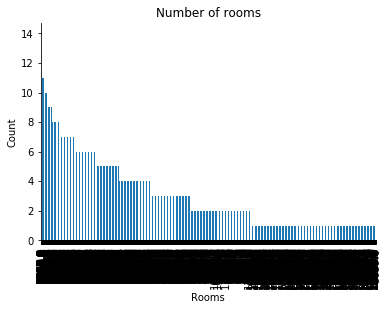

In [38]:
train.total_rooms.value_counts().plot(kind='bar')
plt.title('Number of rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')

sns.despine()

# Data preparation and machine learning

This part you should code and figure out yourself. Play around with different ways to prepare the data, different machine learning models and settings of hyperparameters

Remember to create your own validation set to evaluate your models. Your test set will not contain labels and are therefore not suited for evaluating and tuning your different models. 


In [30]:
import sklearn

In [31]:
from sklearn import preprocessing

data_original = train.data

AttributeError: 'DataFrame' object has no attribute 'data'

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(train, test)

reg.score(train, test)


ValueError: could not convert string to float: 'NEAR BAY'

## Testing

Test the results against the test data set.

# Submission

After you have trained your model and have found predictions on your test data, you must create a csv-file that contains 'Id' and your predictions in two coloums

We have assumed that you have called your predicitons 'median_house_value' after you have trained your model

This is just for demonstrational purposes, that is why all our predictions is zero. Yours will be filled with numbers


In [ ]:

median_house_value = [0 for i in test['Id']]

In [ ]:
len(median_house_value)

In [ ]:
median_house_value[:10]

In [ ]:
submission = pd.DataFrame({'Id': test['Id'], 'median_house_value': median_house_value})

In [ ]:
submission.head()

In [ ]:
# Stores a csv file to submit to the kaggle competition

submission.to_csv('output/submission.csv', index=False)